# Nyáraska-völgy - terrainbento Basic
**Import modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, subplot

from landlab import RasterModelGrid
from landlab import imshow_grid
from landlab.io.esri_ascii import read_esri_ascii, write_esri_ascii
from landlab.components import OverlandFlow, SinkFiller, ChannelProfiler
from landlab.utils import get_watershed_masks
from terrainbento import Basic, Clock

from output_writers import output_writer_1

**Import data**

In [3]:
path = './relief__10m_gauss5_nyaraska_1.asc'
rmg, z = read_esri_ascii(path, name='topographic__elevation')

Compute the minimum and maximum elevation while excluding nodata cells

In [4]:
min_z = np.min(z[np.where(z > 0)])
max_z = np.max(z[np.where(z > 0)])
lim_z = (min_z, max_z)

Set the boundary condition. We are modeling a watershed with only one outlet node. All other nodes will be closed.

In [13]:
rmg.set_watershed_boundary_condition(z, nodata_value=-99999)

Let's plot the imported elevation data.

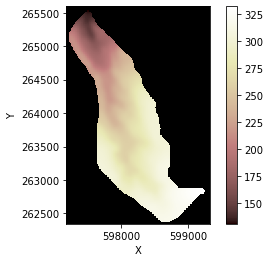

In [14]:
imshow_grid(rmg,
            rmg.at_node['topographic__elevation'],
           limits=lim_z)

Create the Clock and the Basic model.

In [15]:
clock = Clock(start=0, step=10, stop=1000)
model = Basic(clock=clock,
              grid=rmg,
              output_interval=200,
              save_first_timestep=True,
              output_prefix='nyaraska_Basic',
              output_writers={'function': [output_writer_1]},
              flow_director='FlowDirectorD8',
             )

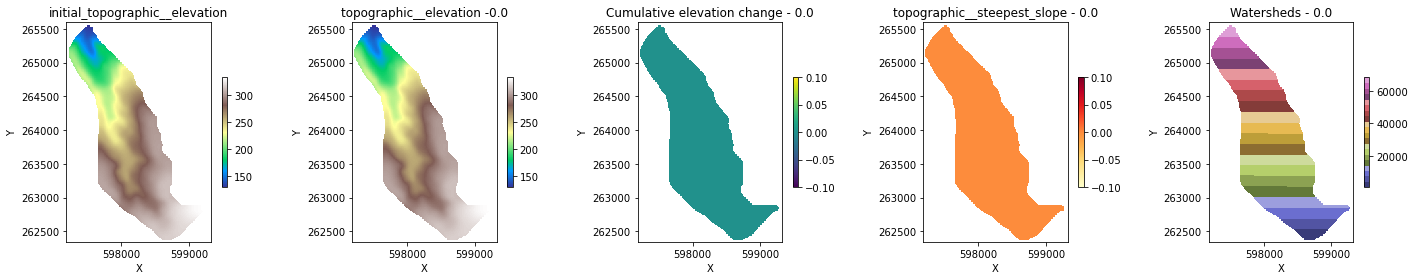

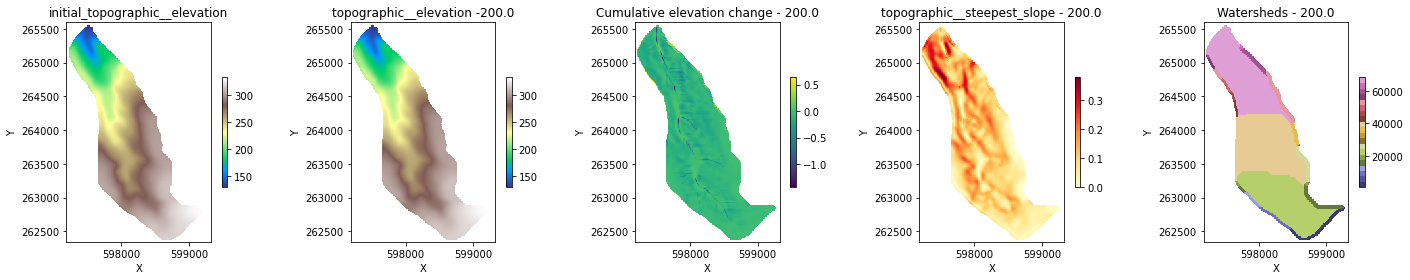

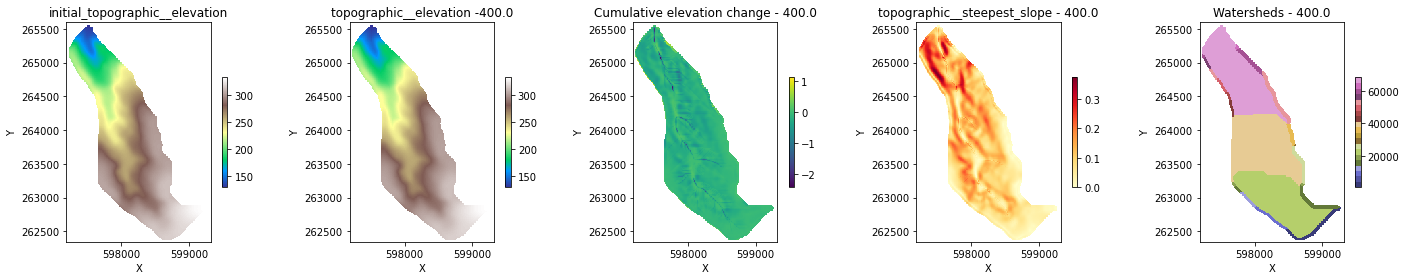

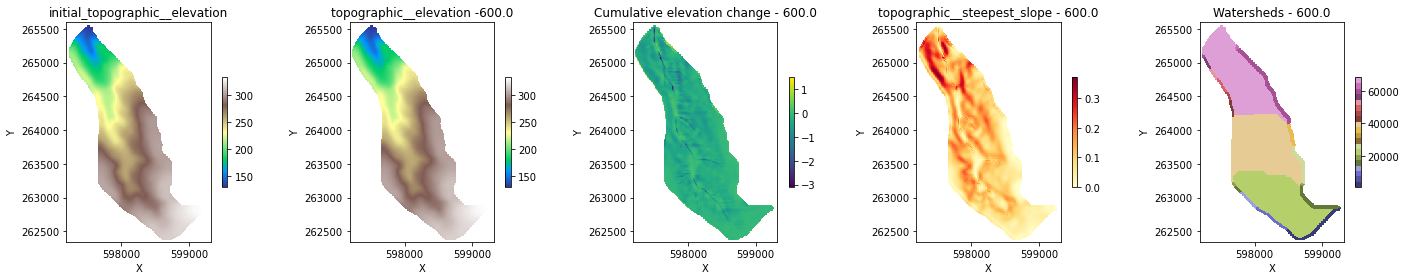

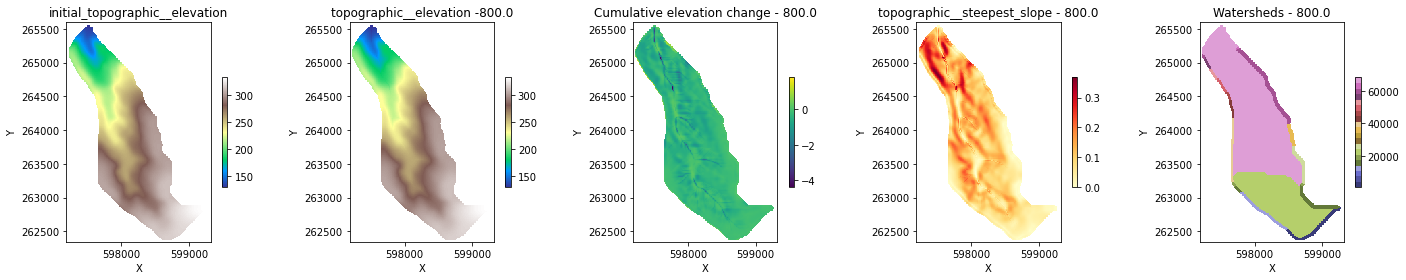

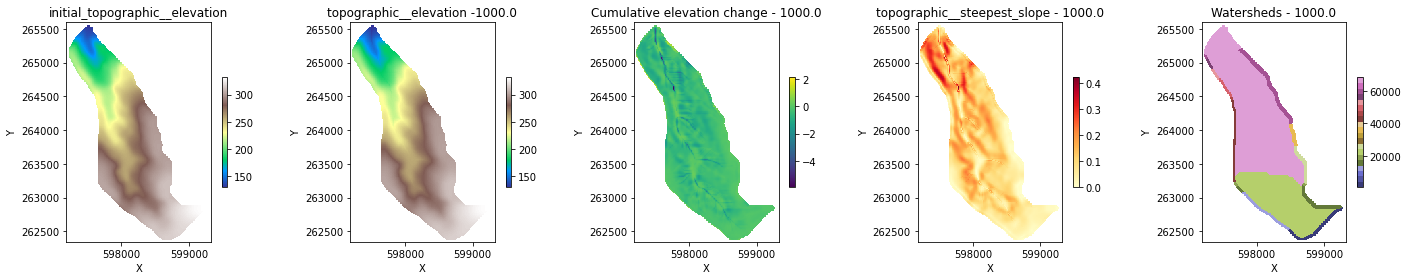

In [16]:
model.run()